In [4]:
import math 
import numpy as np
import pandas as pd 
from datetime import date, timedelta, datetime 
from pandas.plotting import register_matplotlib_converters 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from sklearn.metrics import mean_absolute_error, mean_squared_error 
from keras.models import Sequential 
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import RobustScaler, MinMaxScaler 
import seaborn as sns



date_start = '2016-01-01'
date_today='2021-11-13'
symbol = 'USDUAH=X'
import yfinance as yf 
df = yf.download(symbol, start=date_start, end=date_today)

#Переглянемо датасет
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,23.826000,23.826000,23.826000,23.826000,23.826000,0
2016-01-04,23.853001,23.853001,23.771000,23.820000,23.820000,0
2016-01-05,23.959999,23.959999,23.731001,23.971001,23.971001,0
2016-01-06,23.768999,23.768999,23.051001,23.767000,23.767000,0
2016-01-07,23.006001,23.090000,23.006001,23.054001,23.054001,0
...,...,...,...,...,...,...
2021-11-08,25.796137,25.815416,25.796137,25.841537,25.841537,0
2021-11-09,25.803490,25.843678,25.803490,25.805607,25.805607,0
2021-11-10,25.818039,25.818039,25.791784,25.843678,25.843678,0


In [3]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 7.4 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [5]:
df.isna().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.shape

(1528, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1528 entries, 2016-01-01 to 2021-11-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1528 non-null   float64
 1   High       1528 non-null   float64
 2   Low        1528 non-null   float64
 3   Close      1528 non-null   float64
 4   Adj Close  1528 non-null   float64
 5   Volume     1528 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 83.6 KB


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.0
mean,26.294681,26.387118,26.245780,26.302821,26.302821,0.0
std,1.188467,1.185653,1.186605,1.189844,1.189844,0.0
min,22.834999,22.946453,22.795000,22.795000,22.795000,0.0
25%,25.604750,25.732000,25.549999,25.624750,25.624750,0.0
50%,26.389725,26.475411,26.337090,26.382500,26.382500,0.0
75%,27.219126,27.325676,27.166486,27.213401,27.213401,0.0
max,28.688999,28.688999,28.660000,28.736000,28.736000,0.0


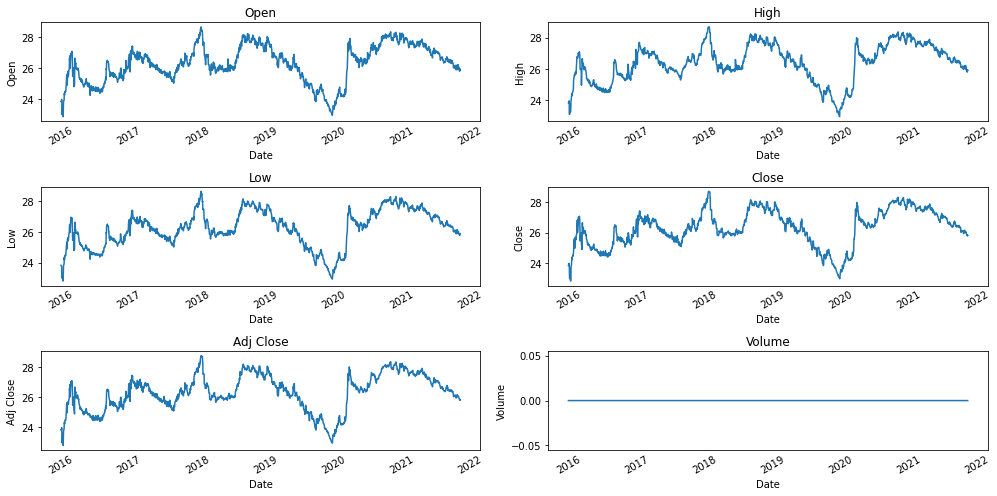

In [9]:
df_plot = df.copy()

list_length = df_plot.shape[1]
ncols = 2
nrows = int(round(list_length / ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(0, list_length):
        ax = plt.subplot(nrows,ncols,i+1)
        sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
        ax.set_title(df_plot.columns[i])
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()

In [10]:
df=df.drop(['Volume'],axis=1)

In [54]:
df

,Open,High,Low,Close,Adj Close
Date,,,,,
2016-01-01,23.826000,23.826000,23.826000,23.826000,23.826000
2016-01-04,23.853001,23.853001,23.771000,23.820000,23.820000
2016-01-05,23.959999,23.959999,23.731001,23.971001,23.971001
2016-01-06,23.768999,23.768999,23.051001,23.767000,23.767000
2016-01-07,23.006001,23.090000,23.006001,23.054001,23.054001
...,...,...,...,...,...
2021-11-08,25.796137,25.815416,25.796137,25.841537,25.841537
2021-11-09,25.803490,25.843678,25.803490,25.805607,25.805607
2021-11-10,25.818039,25.818039,25.791784,25.843678,25.843678


In [11]:
ed=df.copy()
ed['MA30'] = ed['Close'].rolling(30).mean()
ed['MA100'] = ed['Close'].rolling(100).mean()


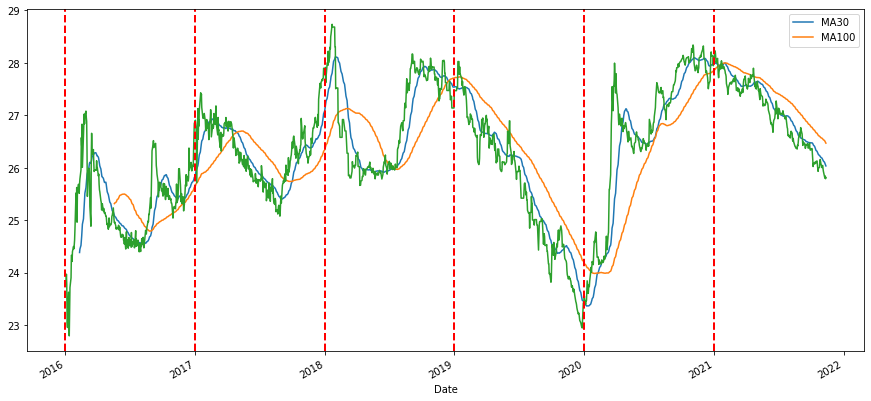

In [15]:
fig, ax = plt.subplots()

ed[['MA30', 'MA100']].plot(ax=ax)
ed['Close'].plot(figsize = (15,7))
plt.axvline('2016',color='r',linestyle='dashed',linewidth=2)
plt.axvline('2017',color='r',linestyle='dashed',linewidth=2)
plt.axvline('2018',color='r',linestyle='dashed',linewidth=2)
plt.axvline('2019',color='r',linestyle='dashed',linewidth=2)
plt.axvline('2020',color='r',linestyle='dashed',linewidth=2)
plt.axvline('2021',color='r',linestyle='dashed',linewidth=2)

In [16]:
ed['Daily_Lag']=ed['Close'].shift(1)
ed.head()

,Open,High,Low,Close,Adj Close,MA30,MA100,Daily_Lag
Date,,,,,,,,
2016-01-01,23.826000,23.826000,23.826000,23.826000,23.826000,NaN,NaN,NaN
2016-01-04,23.853001,23.853001,23.771000,23.820000,23.820000,NaN,NaN,23.826000
2016-01-05,23.959999,23.959999,23.731001,23.971001,23.971001,NaN,NaN,23.820000
2016-01-06,23.768999,23.768999,23.051001,23.767000,23.767000,NaN,NaN,23.971001
2016-01-07,23.006001,23.090000,23.006001,23.054001,23.054001,NaN,NaN,23.767000


In [17]:
ed['Daily Returns']=(ed['Daily_Lag']/ed['Close'])-1
ed.head()

,Open,High,Low,Close,Adj Close,MA30,MA100,Daily_Lag,Daily Returns
Date,,,,,,,,,
2016-01-01,23.826000,23.826000,23.826000,23.826000,23.826000,NaN,NaN,NaN,NaN
2016-01-04,23.853001,23.853001,23.771000,23.820000,23.820000,NaN,NaN,23.826000,0.000252
2016-01-05,23.959999,23.959999,23.731001,23.971001,23.971001,NaN,NaN,23.820000,-0.006299
2016-01-06,23.768999,23.768999,23.051001,23.767000,23.767000,NaN,NaN,23.971001,0.008583
2016-01-07,23.006001,23.090000,23.006001,23.054001,23.054001,NaN,NaN,23.767000,0.030927


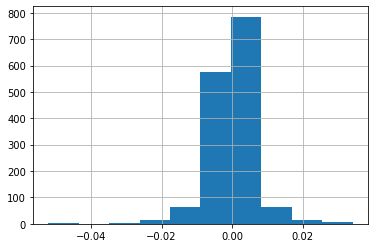

In [18]:
ed['Daily Returns'].hist()

In [19]:
mean = ed['Daily Returns'].mean()
std = ed['Daily Returns'].std()
print('mean =',mean)
print('Std deviation =',std)

mean = -3.3765115982362236e-05
Std deviation = 0.006116649446427963


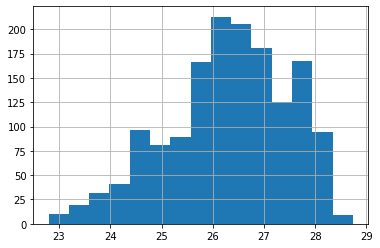

In [23]:
ed['Close'].hist(bins=15)

In [35]:
from scipy.stats import shapiro

stat, p = shapiro(ed['Close'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Ймовірно нормальний')
else:
	print('Ймовірно не нормальний')

stat=0.975, p=0.000
Ймовірно не нормальний


In [49]:
from statsmodels.tsa.stattools import adfuller
y=adfuller(ed['Close'])
p=y[1]
print('p=%.3f' % (p))
if p > 0.05:
	print('Ймовірно не стаціонарний')
else:
	print('Ймовірно стаціонарний')

p=0.019
Ймовірно стаціонарний


In [17]:
ed.drop(['MA30','MA100','Daily_Lag','Daily Returns'],axis=1).corr()

,Open,High,Low,Close,Adj Close
Open,1.000000,0.993393,0.997418,0.996955,0.996955
High,0.993393,1.000000,0.993118,0.992811,0.992811
Low,0.997418,0.993118,1.000000,0.995867,0.995867
Close,0.996955,0.992811,0.995867,1.000000,1.000000
Adj Close,0.996955,0.992811,0.995867,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21fdcffed0>,
      dtype=object)

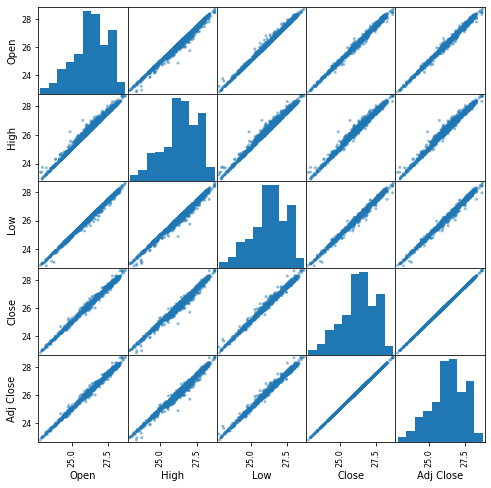

In [28]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (8,8))

In [52]:
import numpy as np
ed['log return'] = np.log(ed['Close']/ed['Close'].shift())

In [53]:
ed

,Open,High,Low,Close,Adj Close,MA30,MA100,Daily_Lag,Daily Returns,log return
Date,,,,,,,,,,
2016-01-01,23.826000,23.826000,23.826000,23.826000,23.826000,NaN,NaN,NaN,NaN,NaN
2016-01-04,23.853001,23.853001,23.771000,23.820000,23.820000,NaN,NaN,23.826000,0.000252,-0.000252
2016-01-05,23.959999,23.959999,23.731001,23.971001,23.971001,NaN,NaN,23.820000,-0.006299,0.006319
2016-01-06,23.768999,23.768999,23.051001,23.767000,23.767000,NaN,NaN,23.971001,0.008583,-0.008547
2016-01-07,23.006001,23.090000,23.006001,23.054001,23.054001,NaN,NaN,23.767000,0.030927,-0.030459
...,...,...,...,...,...,...,...,...,...,...
2021-11-08,25.796137,25.815416,25.796137,25.841537,25.841537,26.107177,26.521988,25.930174,0.003430,-0.003424
2021-11-09,25.803490,25.843678,25.803490,25.805607,25.805607,26.088476,26.509868,25.841537,0.001392,-0.001391
2021-11-10,25.818039,25.818039,25.791784,25.843678,25.843678,26.071975,26.497140,25.805607,-0.001473,0.001474


In [51]:
volatility = ed['Логарифм прибутку'].std()*252**.5
str_vol = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
ed['Логарифм прибутку'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel('Логарифм прибутку')
ax.set_ylabel('Частота логарифму прибутку')
ax.set_title('Волатильність гривні: ' + str_vol + '%')

KeyError: ignored

In [20]:
train_df=df.sort_values(by=['Date']).copy()
date_index=train_df.index
d=pd.to_datetime(train_df.index)
train_df['Month']=d.strftime('%m')
train_df['Year']=d.strftime('%Y')
train_df=train_df.reset_index(drop=True).copy()
train_df.head()

,Open,High,Low,Close,Adj Close,Month,Year
0,23.826000,23.826000,23.826000,23.826000,23.826000,01,2016
1,23.853001,23.853001,23.771000,23.820000,23.820000,01,2016
2,23.959999,23.959999,23.731001,23.971001,23.971001,01,2016
3,23.768999,23.768999,23.051001,23.767000,23.767000,01,2016
4,23.006001,23.090000,23.006001,23.054001,23.054001,01,2016


In [21]:
features=['High', 'Low', 'Open', 'Close', 'Month']
print('FEATURE LIST')
print([f for f in features])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(train_df)
data_filtered = data[features]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['Close']

# Print the tail of the dataframe
data_filtered_ext.tail()

FEATURE LIST
['High', 'Low', 'Open', 'Close', 'Month']


,High,Low,Open,Close,Month,Prediction
1523,25.815416,25.796137,25.796137,25.841537,11,25.841537
1524,25.843678,25.803490,25.803490,25.805607,11,25.805607
1525,25.818039,25.791784,25.818039,25.843678,11,25.843678
1526,25.951303,25.815077,25.951303,25.791784,11,25.791784
1527,25.903637,25.893162,25.893162,25.815077,11,25.815077


In [22]:
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['Close'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

(1528, 5)


In [ ]:
nrows

1528

In [23]:
sequence_length = 50

# Prediction Index
index_Close = data.columns.get_loc("Close")

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

# Create the training and test data
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 6 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation,  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

(1173, 50, 5) (1173,)
(305, 50, 5) (305,)
0.41609158869203267
0.41609158869203267


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 250)           256000    
                                                                 
 lstm_1 (LSTM)               (None, 250)               501000    
                                                                 
 dense (Dense)               (None, 5)                 1255      
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 758,261
Trainable params: 758,261
Non-trainable params: 0
_________________________________________________________________


In [25]:
import tensorflow as  tf

In [26]:
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

250 50 5


In [28]:
epochs = 50
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )

Epoch 1/50
74/74 [==============================] - 26s 301ms/step - loss: 0.0117 - val_loss: 8.0975e-04
Epoch 2/50
74/74 [==============================] - 21s 284ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 3/50
74/74 [==============================] - 21s 286ms/step - loss: 0.0017 - val_loss: 5.4594e-04
Epoch 4/50
74/74 [==============================] - 22s 298ms/step - loss: 0.0012 - val_loss: 7.8059e-04
Epoch 5/50
74/74 [==============================] - 22s 302ms/step - loss: 0.0012 - val_loss: 8.6317e-04
Epoch 6/50
74/74 [==============================] - 23s 310ms/step - loss: 0.0011 - val_loss: 4.1538e-04
Epoch 7/50
74/74 [==============================] - 23s 308ms/step - loss: 9.8197e-04 - val_loss: 7.0173e-04
Epoch 8/50
74/74 [==============================] - 21s 288ms/step - loss: 0.0010 - val_loss: 4.0196e-04
Epoch 9/50
74/74 [==============================] - 22s 294ms/step - loss: 8.2184e-04 - val_loss: 2.9671e-04
Epoch 10/50
74/74 [==============================] 

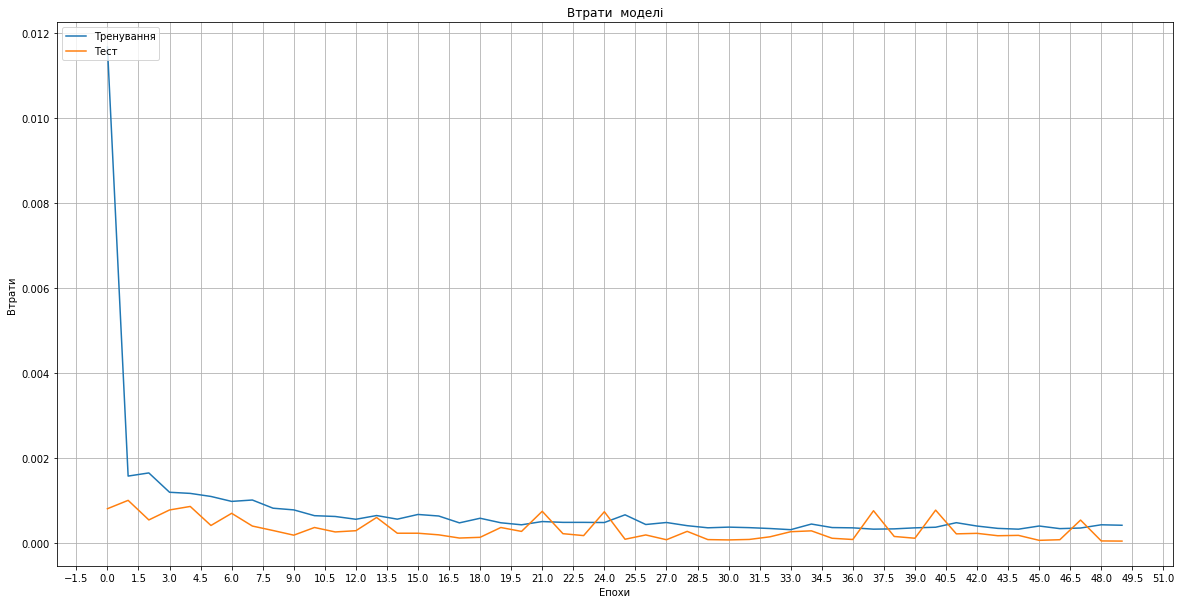

In [29]:
fig,ax=plt.subplots(figsize=(20,10),sharex=True)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Втрати  моделі')
plt.ylabel('Втрати')
plt.xlabel("Епохи")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Тренування","Тест"],loc='upper left')
plt.grid()
plt.show()

In [30]:
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

Median Absolute Error (MAE): 0.03
Mean Absolute Percentage Error (MAPE): 0.11 %
Median Absolute Percentage Error (MDAPE): 0.07 %


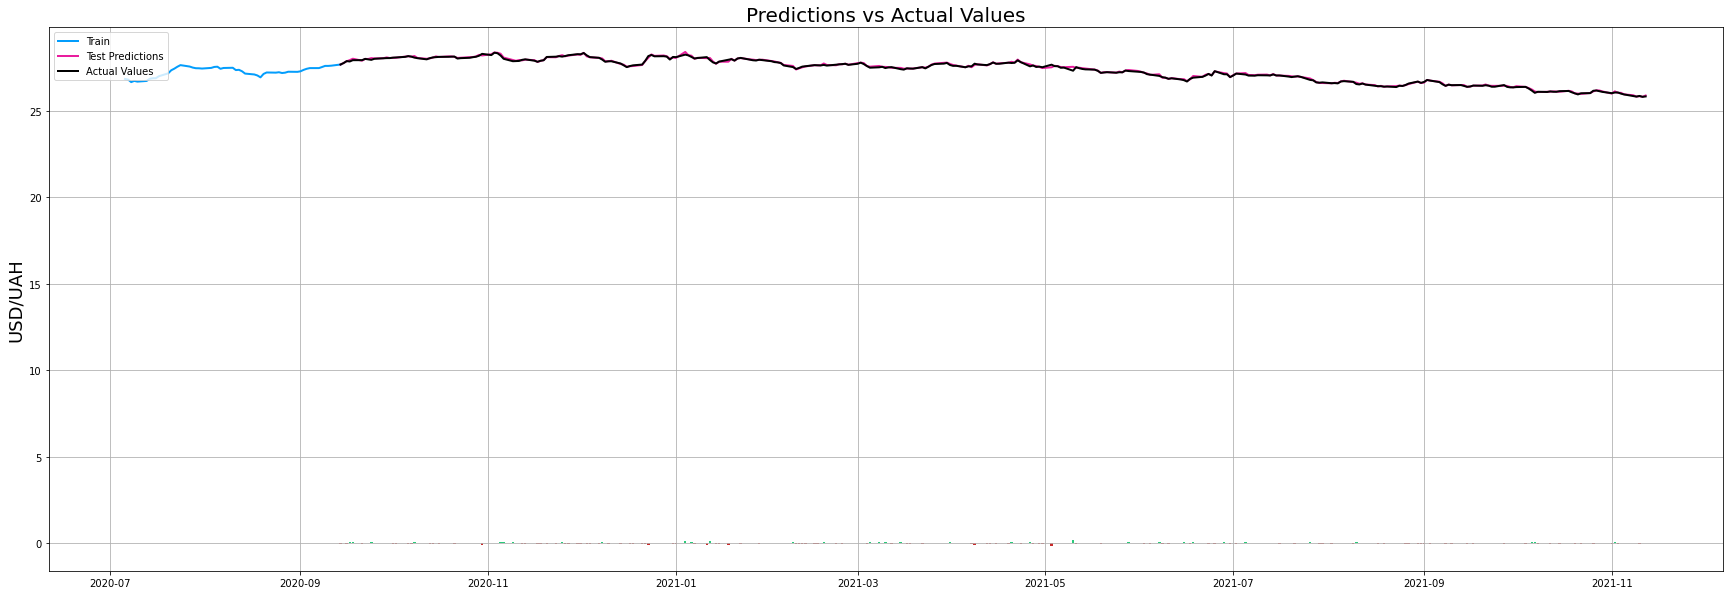

In [31]:
# The date from which on the date is displayed
display_start_date = pd.Timestamp('today') - timedelta(days=500)

# Add the date column
data_filtered_sub = data_filtered.copy()
data_filtered_sub['Date'] = date_index

# Add the difference between the valid and predicted prices
train = data_filtered_sub[:train_data_len + 1]
valid = data_filtered_sub[train_data_len:]
valid.insert(1, "Prediction", y_pred.ravel(), True)
valid.insert(1, "Difference", valid["Prediction"] - valid["Close"], True)

# Zoom in to a closer timeframe
valid = valid[valid['Date'] > display_start_date]
train = train[train['Date'] > display_start_date]

# Visualize the data
fig, ax1 = plt.subplots(figsize=(30, 10), sharex=True)
xt = train['Date']; yt = train[["Close"]]
xv = valid['Date']; yv = valid[["Close", "Prediction"]]
plt.title("Predictions vs Actual Values", fontsize=20)
plt.ylabel(stockname, fontsize=18)
plt.plot(xt, yt, color="#039dfc", linewidth=2.0)
plt.plot(xv, yv["Prediction"], color="#E91D9E", linewidth=2.0)
plt.plot(xv, yv["Close"], color="black", linewidth=2.0)
plt.legend(["Train", "Test Predictions", "Actual Values"], loc="upper left")

# # Create the bar plot with the differences
x = valid['Date']
y = valid["Difference"]

# Create custom color range for positive and negative differences
valid.loc[y >= 0, 'diff_color'] = "#2BC97A"
valid.loc[y < 0, 'diff_color'] = "#C92B2B"

plt.bar(x, y, width=0.8, color=valid['diff_color'])
plt.grid()
plt.show()

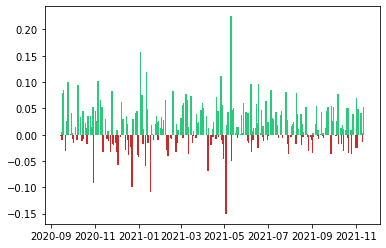

In [32]:
plt.bar(x, y, width=2, color=valid['diff_color'])

plt.show()

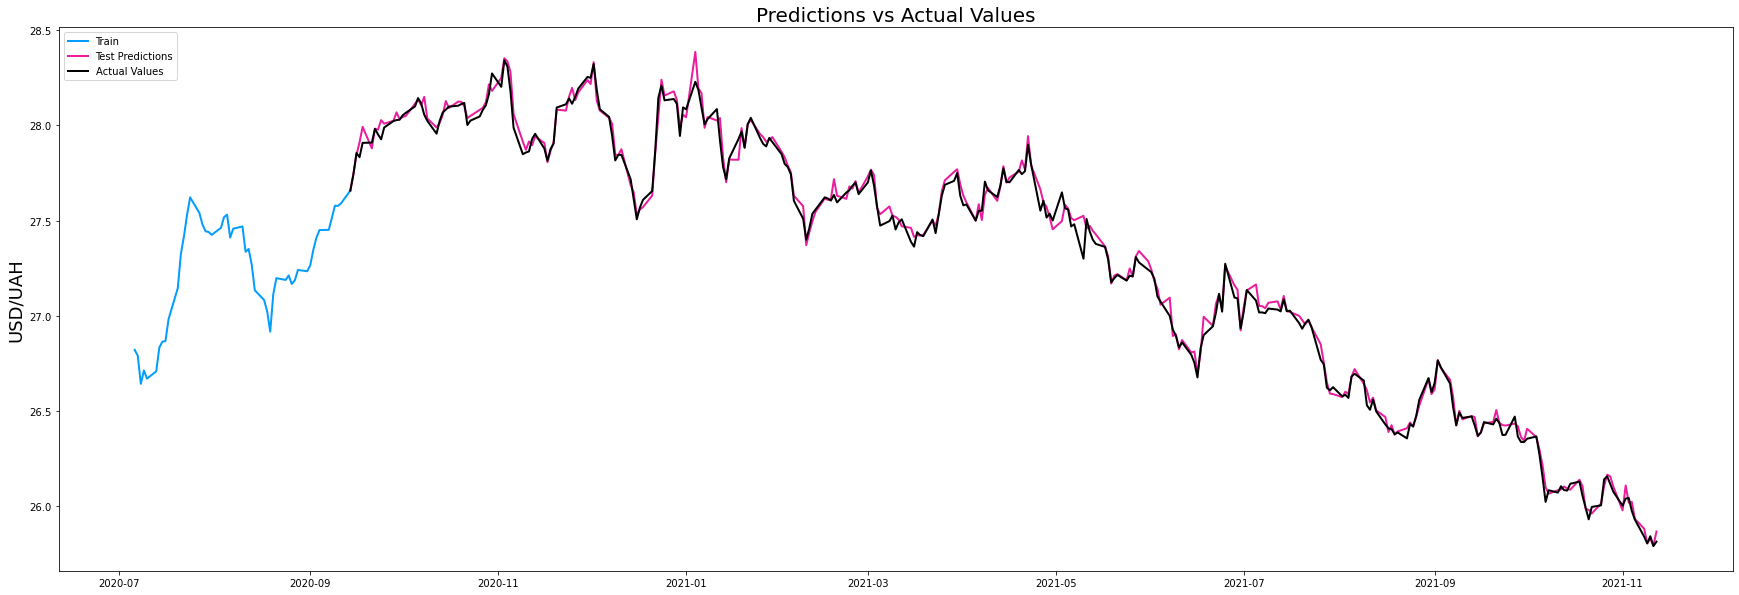

In [33]:
fig, ax1 = plt.subplots(figsize=(30, 10), sharex=True)
xt = train['Date']; yt = train[["Close"]]
xv = valid['Date']; yv = valid[["Close", "Prediction"]]
plt.title("Predictions vs Actual Values", fontsize=20)
plt.ylabel(stockname, fontsize=18)
plt.plot(xt, yt, color="#039dfc", linewidth=2.0)
plt.plot(xv, yv["Prediction"], color="#E91D9E", linewidth=2.0)
plt.plot(xv, yv["Close"], color="black", linewidth=2.0)
plt.legend(["Train", "Test Predictions", "Actual Values"], loc="upper left")

In [34]:
x_input=test_data[305:].reshape(250,-1)
x_input.shape

(250, 1)

In [42]:
x_input

array([[0.64188634],
       [0.63497378],
       [0.64870444],
       [0.64797619],
       [0.72727273],
       [0.60603976],
       [0.61920962],
       [0.61354035],
       [0.62685088],
       [0.72727273],
       [0.61759536],
       [0.63052395],
       [0.62487594],
       [0.61128838],
       [0.72727273],
       [0.61269924],
       [0.62573005],
       [0.62007304],
       [0.62245798],
       [0.72727273],
       [0.61400888],
       [0.62701235],
       [0.62135774],
       [0.6177254 ],
       [0.72727273],
       [0.6245913 ],
       [0.61892506],
       [0.63173868],
       [0.6189913 ],
       [0.72727273],
       [0.5976837 ],
       [0.60677234],
       [0.6010797 ],
       [0.61100747],
       [0.72727273],
       [0.59924079],
       [0.61102802],
       [0.60534338],
       [0.60191441],
       [0.72727273],
       [0.60888689],
       [0.61599721],
       [0.6103219 ],
       [0.60471652],
       [0.72727273],
       [0.61213692],
       [0.61985061],
       [0.619

In [43]:
temp_input=list(x_input)
temp_input=temp_input[1].tolist()

In [44]:
temp_input

[0.634973783305024]

In [46]:
lst_output=[]
n_steps=50
i=0
while(i<1):
    
    if(len(temp_input)>50):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(250,-1)
        x_input = x_input.reshape((1,n_steps,5))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,5))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5226757]
9
[[0.5226756930351257]]


In [49]:
scaler.inverse_transform(lst_output)

ValueError: ignored

In [ ]:
lst_output[1]

[0.5131264328956604]